# Life Expectancy & Gross Domestic Product (GDP)

### Life expectancy

Estimate of the average number of additional years that a person of a given age can expect to live. The most common measure of life expectancy is life expectancy at birth. Life expectancy is a hypothetical measure. It assumes that the age-specific death rates for the year in question will apply throughout the lifetime of individuals born in that year. The estimate, in effect, projects the age-specific mortality (death) rates for a given period over the entire lifetime of the population born (or alive) during that time. The measure differs considerably by sex, age, race, and geographic location. Therefore, life expectancy is commonly given for specific categories, rather than for the population in general. (Source: [Britannica](https://www.britannica.com/science/life-expectancy))

### What Is Gross Domestic Product (GDP)?

Gross domestic product (GDP) is the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific time period. As a broad measure of overall domestic production, it functions as a comprehensive scorecard of a given country’s economic health. *(Source: [Investopedia.com](https://www.investopedia.com/terms/g/gdp.asp))*

### Question to answer:
**Is there a relationship between GDP and life expectancy?**

In [1]:
# let's import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from project_func import *

In [2]:
# read csv and see the top 5 instances of the data
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# prints information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [5]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [6]:
# set the aesthetic style and context of the plots
sns.set_style("darkgrid")
sns.set_context("notebook")

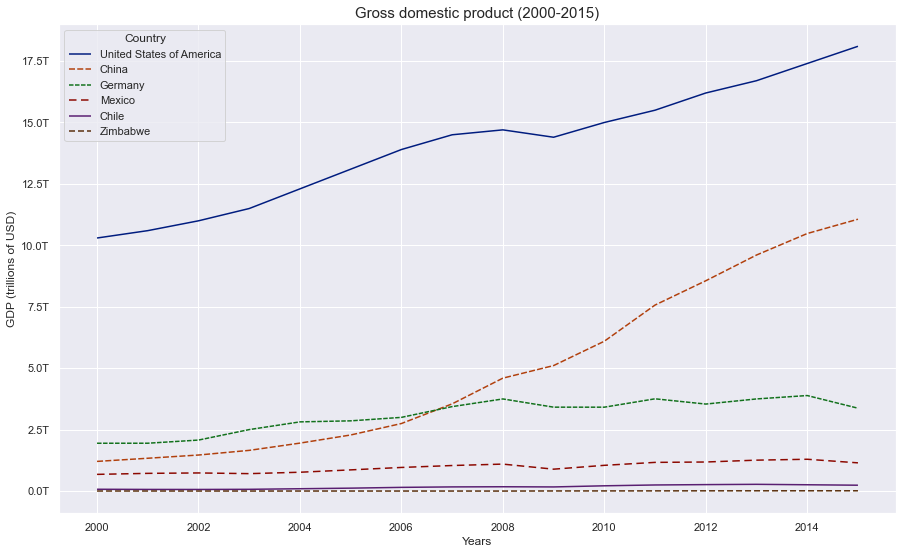

In [7]:
fig, ax = plt.subplots(figsize=(15, 9)) 

# sort dataframe by GDP
data = df.sort_values("GDP", ascending=False).copy()

#style palette
dash_list = [(1, 0), (4, 1.5), (3, 1), (5, 3), (1, 0), (4, 2)]
style = {key:value for key,value in zip(data["Country"].unique(), dash_list)}

g = sns.lineplot(data=data, x="Year", y="GDP", 
             hue="Country", 
             palette="dark", 
             style="Country", 
             dashes=style
)

# convert yticks to trillon
func_y = ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/10 ** 12) + 'T')
ax.yaxis.set_major_formatter(func_y)
ax.set_xlabel("Years")
ax.set_ylabel("GDP (trillions of USD)")
ax.set_title("Gross domestic product (2000-2015)", fontsize=15)
plt.show()

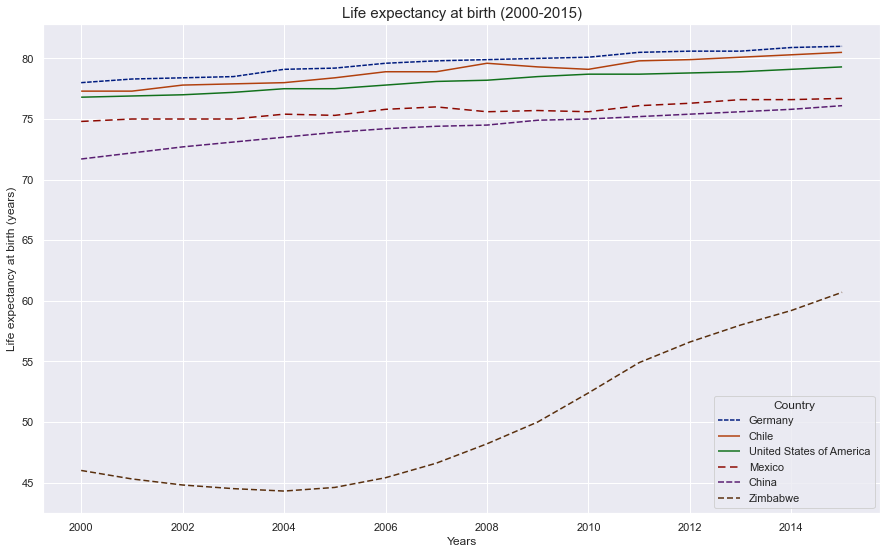

In [8]:
plt.figure(figsize=(15, 9))

# sort dataframe by Life expectancy
data = df.sort_values("Life expectancy at birth (years)", ascending=False).copy()

sns.lineplot(data=data, x="Year", y="Life expectancy at birth (years)", 
             hue="Country", 
             palette="dark", 
             style="Country", 
             dashes=style
)
plt.ylabel("Life expectancy at birth (years)")
plt.xlabel("Years")
plt.title("Life expectancy at birth (2000-2015)", fontsize=15)
plt.show()

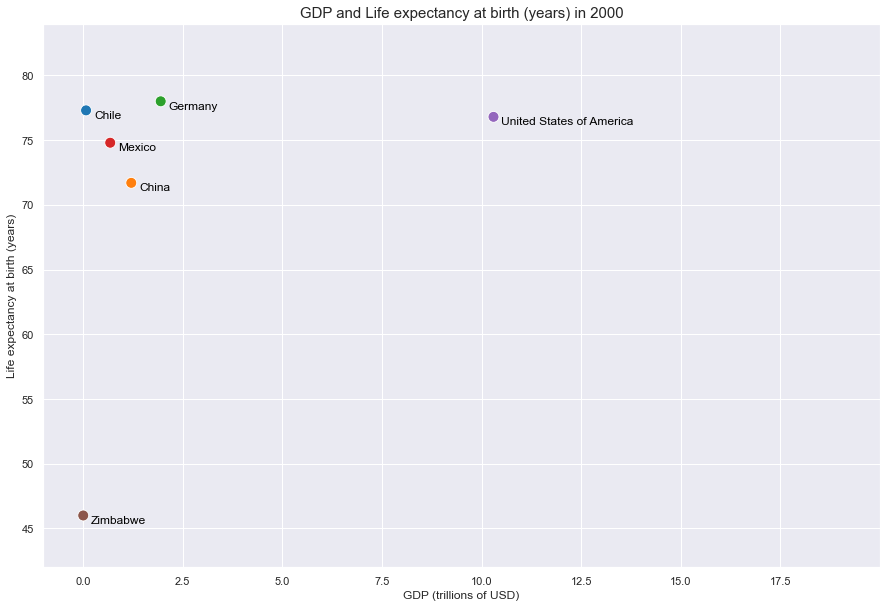

In [7]:
labeled_scatter(df, 2000)

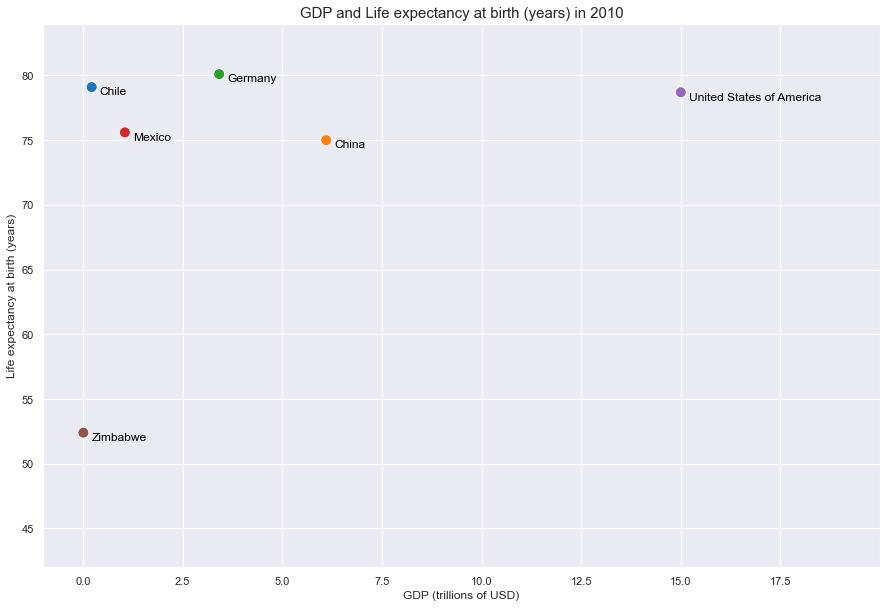

In [8]:
labeled_scatter(df, 2010)

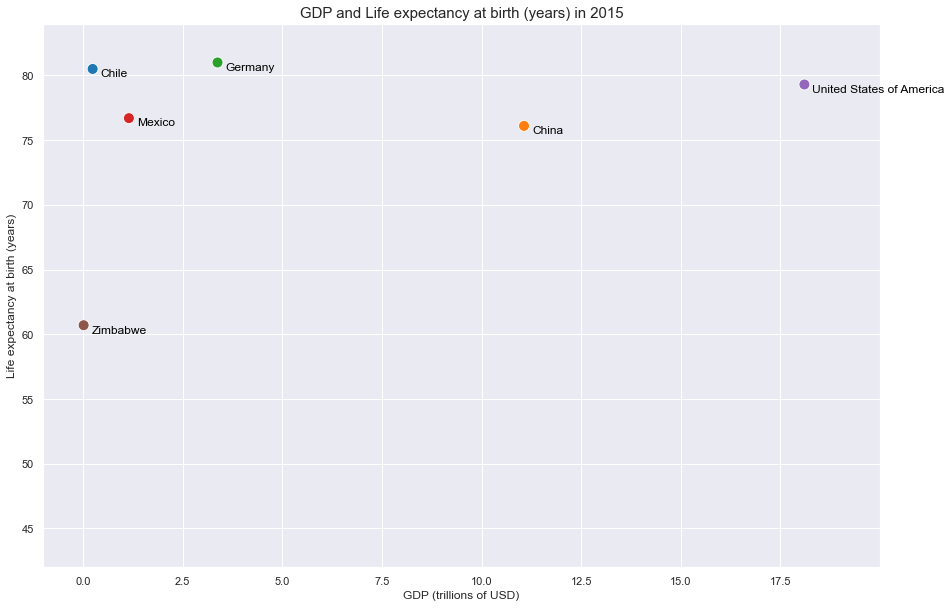

In [9]:
labeled_scatter(df, 2015)

## Create images for an animation

In [11]:
#for year in range(2000,2016):
#    labeled_scatter(df, year, save=True)

### [View the animation](https://youtu.be/Gt_NveM8yIQ)

## Analyze each country

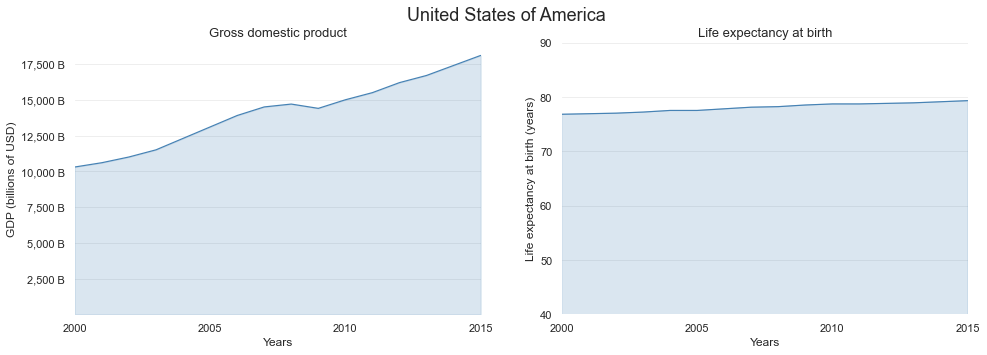

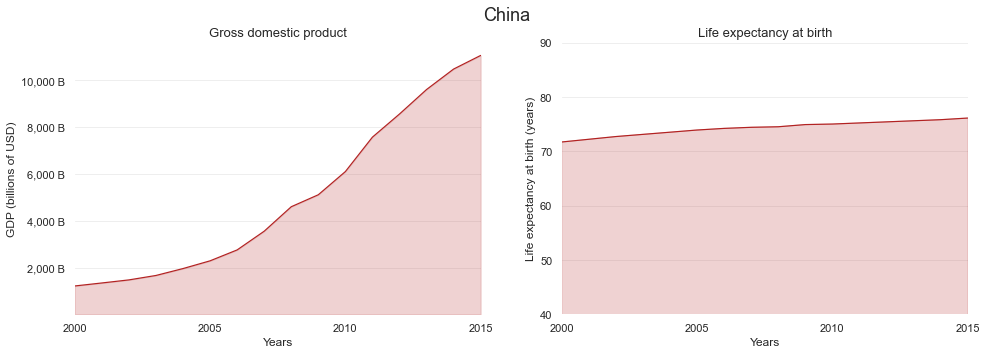

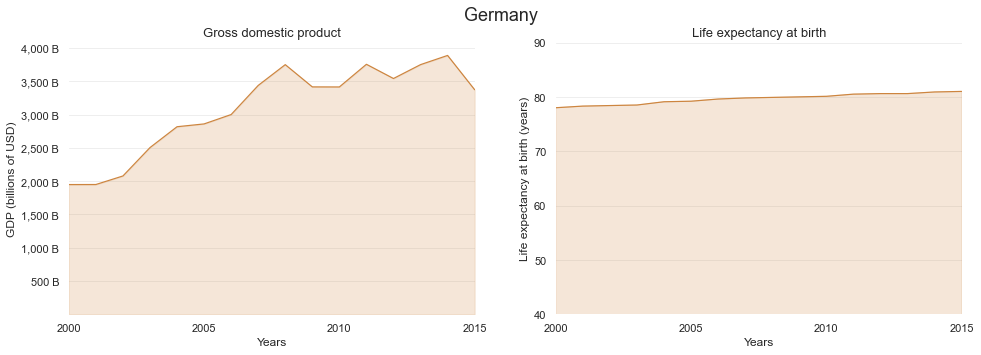

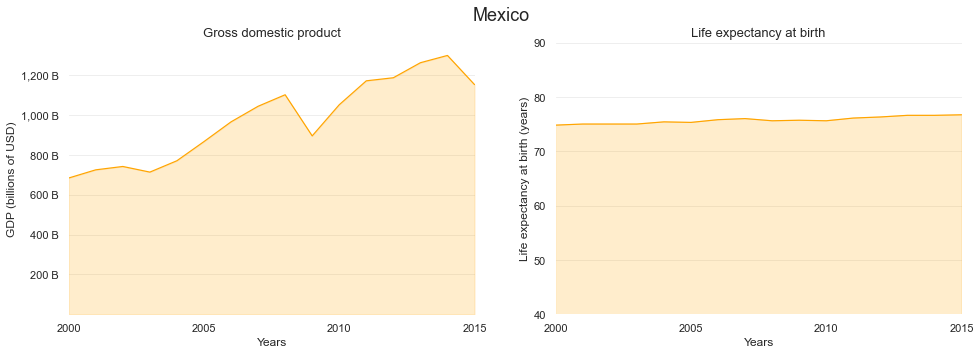

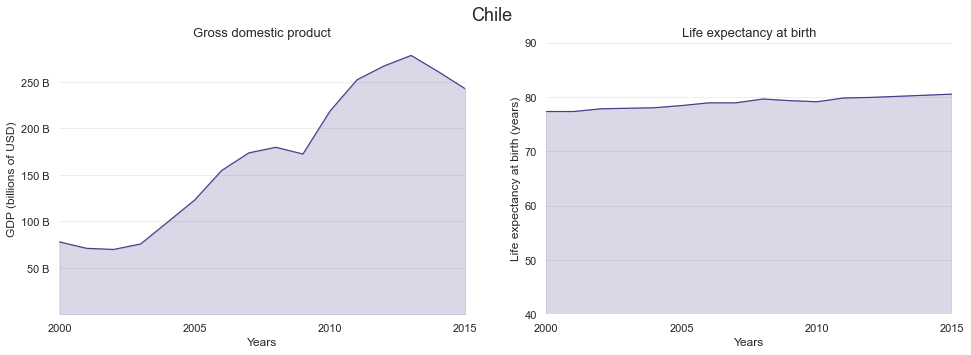

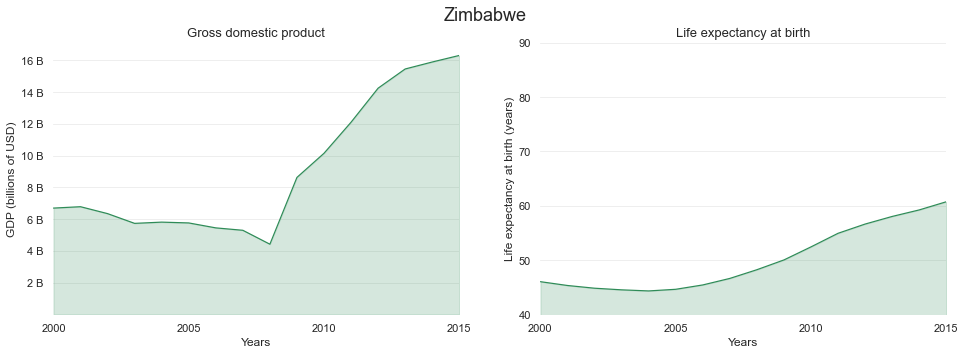

In [44]:
# list of countries ordered by GDP
list_p = df.sort_values("GDP", ascending=False)["Country"].unique().tolist()
# different colors for plot
color_p = ["steelblue", "firebrick", "peru", "orange", "darkslateblue", "seagreen"]

# loop to call function compare_plots from project_func.py file
for i, country in enumerate(list_p):
    compare_plots(df, country, color_p[i])

## Conclusions

* In each country where there is an increase in GDP, there is also an increase in life expectancy.
<br><br>
* There exists a systematic non-linear relationship between income levels and the average lifespan within a country.
<br><br>
* Countries with lower GDP such as Zimbabwe have a substantial increase in life expectancy when they grow, whereas this effect diminishes, yet remains positive, for richer countries.

